# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Skillfactory---Практический-Machine-Learning" data-toc-modified-id="Skillfactory---Практический-Machine-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skillfactory - Практический Machine Learning</a></div><div class="lev2 toc-item"><a href="#Обучение-без-учителя,-понижение-размерности,-кластеризация" data-toc-modified-id="Обучение-без-учителя,-понижение-размерности,-кластеризация-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обучение без учителя, понижение размерности, кластеризация</a></div><div class="lev3 toc-item"><a href="#Иерархическая-кластеризация:-Пищевая-ценность-продуктов" data-toc-modified-id="Иерархическая-кластеризация:-Пищевая-ценность-продуктов-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Иерархическая кластеризация: Пищевая ценность продуктов</a></div><div class="lev2 toc-item"><a href="#DBSCAN:-Геоданные" data-toc-modified-id="DBSCAN:-Геоданные-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DBSCAN: Геоданные</a></div><div class="lev3 toc-item"><a href="#Отток-в-игре:-PCA-+-RFE" data-toc-modified-id="Отток-в-игре:-PCA-+-RFE-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Отток в игре: PCA + RFE</a></div><div class="lev3 toc-item"><a href="#Сжатие-признаков-для-визуализации" data-toc-modified-id="Сжатие-признаков-для-визуализации-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Сжатие признаков для визуализации</a></div><div class="lev3 toc-item"><a href="#RFE-+-Decision-tree" data-toc-modified-id="RFE-+-Decision-tree-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>RFE + Decision tree</a></div>

# Skillfactory - Практический Machine Learning
## Обучение без учителя, понижение размерности, кластеризация

<center> Шестаков Андрей </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, IntSlider, fixed, FloatSlider

### Иерархическая кластеризация: Пищевая ценность продуктов

Загрузите файл `food.txt`. В нем содержится информация о пищевой ценности разных продуктов

In [5]:
df = pd.read_csv('data/food.txt', sep=' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [6]:
df.shape

(27, 6)

In [7]:
df['Name'].value_counts()

Canned tuna            1
Broiled mackerel       1
Canned clams           1
Hamburger              1
Fried perch            1
Fried haddock          1
Veal cutlet            1
Canned sardines        1
Canned beef            1
Canned shrimp          1
Canned mackerel        1
Roast beef             1
Pork simmered          1
Beefsteak              1
Baked bluefish         1
Canned salmon          1
Braised beef           1
Canned crabmeat        1
Roast lamb shoulder    1
Smoked ham             1
Roast lamb leg         1
Beef tongue            1
Raw clams              1
Canned chicken         1
Pork roast             1
Beef heart             1
Broiled chicken        1
Name: Name, dtype: int64

* Подготовте данные к кластеризации 
    * Выделите признаки в матрицу X (numpy array)
    * Отнормируйте признаки

In [9]:
from sklearn.preprocessing import StandardScaler
X_food=df.drop('Name', axis=1).values

scaler=StandardScaler()
scaler.fit(X_food)
X_food=scaler.transform(X_food)
X_food

array([[ 1.33505901,  0.23968064,  1.31429714, -0.45658134,  0.1523851 ],
       [ 0.37851533,  0.47936128,  0.31851589, -0.45658134,  0.22212065],
       [ 2.14056947, -0.95872255,  2.31007839, -0.48269934, -0.26602823],
       [ 1.68746984,  0.        ,  1.67639941, -0.45658134,  0.1523851 ],
       [-0.27596192,  0.71904192, -0.31516309, -0.35210934,  0.9194762 ],
       [-0.93043917,  0.23968064, -0.94884207, -0.46964034, -0.68444155],
       [-0.37665073,  1.43808383, -0.58673979, -0.41740434, -0.614706  ],
       [-0.47733953,  1.67776447, -0.76779093, -0.39128634,  2.45365839],
       [ 0.57989295,  0.23968064,  0.59009259, -0.45658134,  0.1523851 ],
       [ 0.93230378, -0.23968064,  1.04272043, -0.45658134, -0.05682156],
       [ 1.33505901,  0.23968064,  1.31429714, -0.45658134,  0.08264955],
       [ 1.33505901,  0.        ,  1.40482271, -0.45658134,  0.08264955],
       [ 1.48609222,  0.        ,  1.49534827, -0.45658134,  0.01291399],
       [-0.0242399 , -0.23968064,  0.0

* Произведите иерарническую кластеризацию этого набора данных (метод `linkage`)
* Выберите тип пересчета расстояния между кластерами с помощью кофенетической корреляции

In [10]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage, cophenet

# возвращает матрицу связей
X_food_cl=linkage(X_food, method='single', metric='euclidean', optimal_ordering=False)
X_food_cl

array([[ 0.        , 10.        ,  0.06973555,  2.        ],
       [11.        , 12.        ,  0.18939102,  2.        ],
       [ 6.        , 25.        ,  0.21915945,  2.        ],
       [27.        , 28.        ,  0.25620634,  4.        ],
       [ 3.        , 30.        ,  0.30460573,  5.        ],
       [ 1.        ,  8.        ,  0.4202579 ,  2.        ],
       [ 9.        , 31.        ,  0.60846432,  6.        ],
       [ 4.        , 14.        ,  0.75192779,  2.        ],
       [32.        , 33.        ,  0.77628604,  8.        ],
       [20.        , 22.        ,  0.78097139,  2.        ],
       [ 5.        , 15.        ,  0.79940943,  2.        ],
       [18.        , 19.        ,  0.80176192,  2.        ],
       [13.        , 35.        ,  0.87927317,  9.        ],
       [21.        , 23.        ,  0.94966792,  2.        ],
       [29.        , 37.        ,  0.9722615 ,  4.        ],
       [36.        , 38.        ,  0.9855951 ,  4.        ],
       [34.        , 41.

In [13]:
X_food_cl.shape

(26, 4)

In [16]:
X_food_coph=cophenet(X_food_cl)
X_food_coph

array([0.77628604, 1.30451107, 0.30460573, 1.05793949, 1.05793949,
       1.05793949, 1.87611931, 0.77628604, 0.60846432, 0.06973555,
       0.25620634, 0.25620634, 0.87927317, 1.05793949, 1.05793949,
       3.48348225, 3.48348225, 1.01109572, 1.01109572, 1.01109572,
       1.78429865, 1.01109572, 1.78429865, 3.14490724, 1.05793949,
       1.56538764, 1.30451107, 0.77628604, 1.05793949, 1.05793949,
       1.05793949, 1.87611931, 0.4202579 , 0.77628604, 0.77628604,
       0.77628604, 0.77628604, 0.87927317, 1.05793949, 1.05793949,
       3.48348225, 3.48348225, 1.01109572, 1.01109572, 1.01109572,
       1.78429865, 1.01109572, 1.78429865, 3.14490724, 1.05793949,
       1.56538764, 1.30451107, 1.30451107, 1.30451107, 1.30451107,
       1.87611931, 1.30451107, 1.30451107, 1.30451107, 1.30451107,
       1.30451107, 1.30451107, 1.30451107, 1.30451107, 3.48348225,
       3.48348225, 1.30451107, 1.30451107, 1.30451107, 1.78429865,
       1.30451107, 1.78429865, 3.14490724, 1.30451107, 1.56538

In [17]:
X_food_coph.shape

(351,)

In [22]:
from scipy.spatial.distance import pdist
c, coph_dists = cophenet(X_food_cl, pdist(X_food))

In [19]:
c

0.7749300289356731

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist">Метрики</a>  

Оценка качества кластеризации  
Кофенетическая корреляция  
Кофенетическое расстояние - расстояние между объектами на дендрограмме  

Кофенетическую корреляцию можно рассчитать как пирсоновскую корреляцию (обычную) между матрицами исходных и кофенетических расстояний между всеми парами объектов  

Метод, который дает наибольшую кофенетическую корреляцию дает кластеры лучше всего отражающие исходные данные

In [24]:
import numpy as np
metrics = ['euclidean', 'cityblock', 'cosine', 'correlation', 'hamming', 'jaccard', 'chebyshev', 'canberra', 'braycurtis', 
           'matching', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath']

for m in metrics:
    X_food_cl=linkage(X_food, method='single', metric=m, optimal_ordering=False)
    c, coph_dists = cophenet(X_food_cl, pdist(X_food, metric=m))
    print('metric =', m, 'and c =', c)

metric = euclidean and c = 0.7749300289356731
metric = cityblock and c = 0.7345358535231589
metric = cosine and c = 0.7174261741365753
metric = correlation and c = 0.7921316353700594
metric = hamming and c = 0.6453006924517507
metric = jaccard and c = 0.6024705878690918
metric = chebyshev and c = 0.8440074227362415
metric = canberra and c = 0.7069798245886599
metric = braycurtis and c = 0.6069432603089907
metric = matching and c = 0.6453006924517507
metric = dice and c = 1.0
metric = kulsinski and c = 1.0
metric = rogerstanimoto and c = 1.0
metric = russellrao and c = 1.0
metric = sokalmichener and c = 1.0
metric = sokalsneath and c = 1.0


* Изобразите дендрограмму
    * Сначала просто посмотрите на результат метода `dendrogram`
    * Сделаем визуализацию более наглядной:
        * Выделите названия продуктов в numpy array c названием `names`
        * Выполните `dendrogram`  аргументами `orientation='left'`, `labels=names`
        * Теперь мы должны увидеть, что дендрограмма транспонировалась и вместо безымянных индексов мы имеем наименования объектов
        
        
Дендрограмма (dendrogram) - древовидная диаграмма, содержащая n уровней, каждый из которых соответствует одному из шагов процесса последовательного укрупнения кластеров.Дендрограмму также называют древовидной схемой, деревом объединения кластеров, деревом иерархической структуры. Дендрограмма представляет собой вложенную группировку объектов, которая изменяется на различных уровнях иерархии.

{'color_list': ['g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b'],
 'dcoord': [[0.0, 0.9587225543243534, 0.9587225543243534, 0.0],
  [0.0, 0.7670910954264218, 0.7670910954264218, 0.0],
  [0.0, 0.27157670433566716, 0.27157670433566716, 0.0],
  [0.0, 0.06973555412967476, 0.06973555412967476, 0.0],
  [0.0, 0.1510332118056794, 0.1510332118056794, 0.0],
  [0.0, 0.20137761574090596, 0.20137761574090596, 0.1510332118056794],
  [0.06973555412967476,
   0.23968063858108835,
   0.23968063858108835,
   0.20137761574090596],
  [0.0, 0.4027552314818118, 0.4027552314818118, 0.23968063858108835],
  [0.27157670433566716,
   0.4793612771621767,
   0.4793612771621767,
   0.4027552314818118],
  [0.0, 0.6041328472227178, 0.6041328472227178, 0.4793612771621767],
  [0.0, 0.697355541296747, 0.697355541296747, 0.6041328472227178],
  [0.0, 0.697355541296747, 0.697355541296747, 0.697

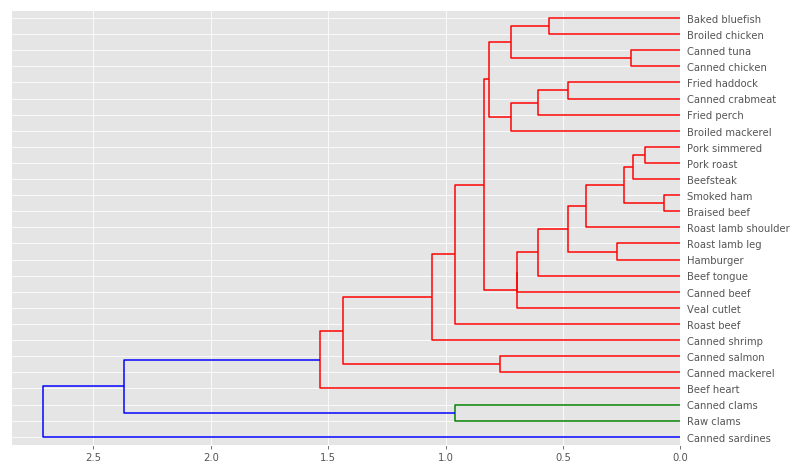

In [30]:
names=df['Name'].values

dendrogram(linkage(X_food, method='single', metric='chebyshev', optimal_ordering=False), orientation='left', labels=names)

* Выделите кластеры по дендрограмме с помощью метода `fcluster`
    * Наличие кластеров, состоящих из одного объекта - нормальное явление, если это можно объяснить  
    
        * Консервированный тунец
        * Бройловая скумбрия
        * Консервированные моллюски
        * Гамбургер
        * Жареный окунь
        * Жареная пикша
        * Телячьи котлеты
        * Консервированные сардины
        * Консервированная говядина
        * Консервированные креветки
        * Консервированная скумбрия
        * Жареная говядина
        * Свинина вареная
        * Beefsteak
        * Запеченная голубая рыба
        * Консервированный лосось
        * Тушеная говядина
        * Консервированное крабовое мясо
        * Жаркое из ягненка
        * Копченая ветчина
        * Жареная ягненка
        * Говяжий язык
        * Сырые моллюски
        * Консервы куриные
        * Свиной жаркое
        * Говяжье сердце
        * Куриный цыпленок
        
 <a href="https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/">Описание</a>

In [68]:
names=df['Name'].values

Fl=np.arange(0.0, 1.2, 0.05)
max_d=2
for fl in Fl:
    X_food_cl = linkage(X_food, method='single', metric='chebyshev', optimal_ordering=False)
    X_food_fcl = fcluster(X_food_cl, depth=max_d, t=fl, criterion='inconsistent', R=None, monocrit=None)
    res=pd.DataFrame(['Консервированный тунец', 'Бройловая скумбрия', 'Консервированные моллюски', 'Гамбургер', 
                   'Жареный окунь', 'Жареная пикша', 'Телячьи котлеты', 'Консервированные сардины', 
                   'Консервированная говядина', 'Консервированные креветки', 'Консервированная скумбрия', 
                   'Жареная говядина', 'Свинина вареная', 'Beefsteak', 'Запеченная голубая рыба', 'Консервированный лосось', 
                   'Тушеная говядина', 'Консервированное крабовое мясо', 'Жаркое из ягненка', 'Копченая ветчина', 
                   'Жареная ягненка', 'Говяжий язык', 'Сырые моллюски', 'Консервы куриные', 'Свиной жаркое', 
                   'Говяжье сердце', 'Куриный цыпленок'], columns=['Name'])
    res['Group']=X_food_fcl
    print('t', fl)
    print(res)
    print('--------------------------------------------------------------', '\n')

t 0.0
                              Name  Group
0           Консервированный тунец      4
1               Бройловая скумбрия      3
2        Консервированные моллюски     16
3                        Гамбургер      6
4                    Жареный окунь      9
5                    Жареная пикша     15
6                  Телячьи котлеты     14
7         Консервированные сардины     18
8        Консервированная говядина      3
9        Консервированные креветки      7
10       Консервированная скумбрия      4
11                Жареная говядина      5
12                 Свинина вареная      5
13                       Beefsteak      8
14         Запеченная голубая рыба     10
15         Консервированный лосось     15
16                Тушеная говядина      1
17  Консервированное крабовое мясо      1
18               Жаркое из ягненка     11
19                Копченая ветчина     11
20                 Жареная ягненка     13
21                    Говяжий язык      2
22                  Сырые мо

{'color_list': ['g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b'],
 'dcoord': [[0.0, 0.9587225543243534, 0.9587225543243534, 0.0],
  [0.0, 0.7670910954264218, 0.7670910954264218, 0.0],
  [0.0, 0.27157670433566716, 0.27157670433566716, 0.0],
  [0.0, 0.06973555412967476, 0.06973555412967476, 0.0],
  [0.0, 0.1510332118056794, 0.1510332118056794, 0.0],
  [0.0, 0.20137761574090596, 0.20137761574090596, 0.1510332118056794],
  [0.06973555412967476,
   0.23968063858108835,
   0.23968063858108835,
   0.20137761574090596],
  [0.0, 0.4027552314818118, 0.4027552314818118, 0.23968063858108835],
  [0.27157670433566716,
   0.4793612771621767,
   0.4793612771621767,
   0.4027552314818118],
  [0.0, 0.6041328472227178, 0.6041328472227178, 0.4793612771621767],
  [0.0, 0.697355541296747, 0.697355541296747, 0.6041328472227178],
  [0.0, 0.697355541296747, 0.697355541296747, 0.697

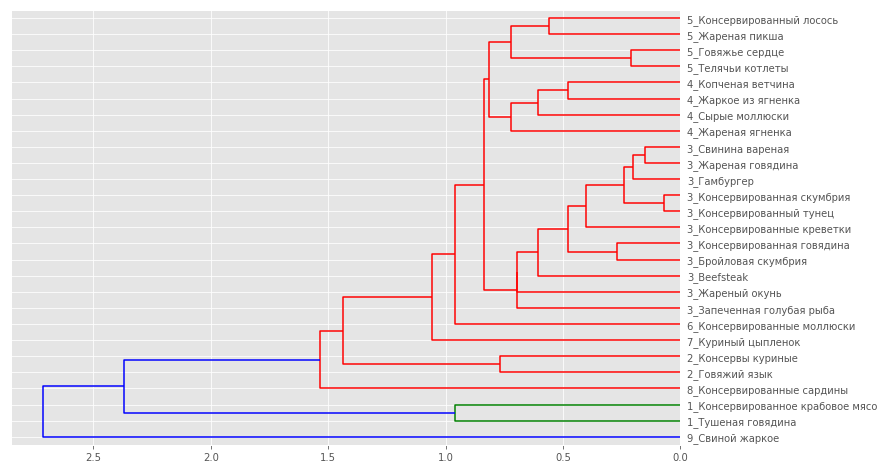

In [69]:
X_food_cl = linkage(X_food, method='single', metric='chebyshev', optimal_ordering=False)
X_food_fcl = fcluster(X_food_cl, t=1.05, criterion='inconsistent', depth=2, R=None, monocrit=None)
res=pd.DataFrame(['Консервированный тунец', 'Бройловая скумбрия', 'Консервированные моллюски', 'Гамбургер', 
               'Жареный окунь', 'Жареная пикша', 'Телячьи котлеты', 'Консервированные сардины', 
               'Консервированная говядина', 'Консервированные креветки', 'Консервированная скумбрия', 
               'Жареная говядина', 'Свинина вареная', 'Beefsteak', 'Запеченная голубая рыба', 'Консервированный лосось', 
               'Тушеная говядина', 'Консервированное крабовое мясо', 'Жаркое из ягненка', 'Копченая ветчина', 
               'Жареная ягненка', 'Говяжий язык', 'Сырые моллюски', 'Консервы куриные', 'Свиной жаркое', 
               'Говяжье сердце', 'Куриный цыпленок'], columns=['Name'])
res['Group']=X_food_fcl
res['Group_Name']=res['Group'].apply(lambda x: str(x))+'_'+res['Name']
Names=np.array(res['Group_Name'])
dendrogram(X_food_cl, orientation='left', labels=Names)

{'color_list': ['g', 'r', 'r', 'r', 'r', 'r', 'b', 'b'],
 'dcoord': [[0.0, 0.9587225543243534, 0.9587225543243534, 0.0],
  [0.0, 0.8368266495560964, 0.8368266495560964, 0.0],
  [0.0, 0.9587225543243534, 0.9587225543243534, 0.8368266495560964],
  [0.0, 1.057779013943878, 1.057779013943878, 0.9587225543243534],
  [0.0, 1.43808383148653, 1.43808383148653, 1.057779013943878],
  [0.0, 1.5341821908528437, 1.5341821908528437, 1.43808383148653],
  [0.9587225543243534,
   2.3710088404089396,
   2.3710088404089396,
   1.5341821908528437],
  [0.0, 2.716272035806502, 2.716272035806502, 2.3710088404089396]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [35.0, 35.0, 54.375, 54.375],
  [20.0, 20.0, 44.6875, 44.6875],
  [5.0, 5.0, 32.34375, 32.34375]],
 'ivl': ['24', '16', '17', '7', '(2)', '26', '2', '(11)', '(8)'],
 'leaves': [24, 16, 17, 7, 43, 26, 2, 40, 44]}

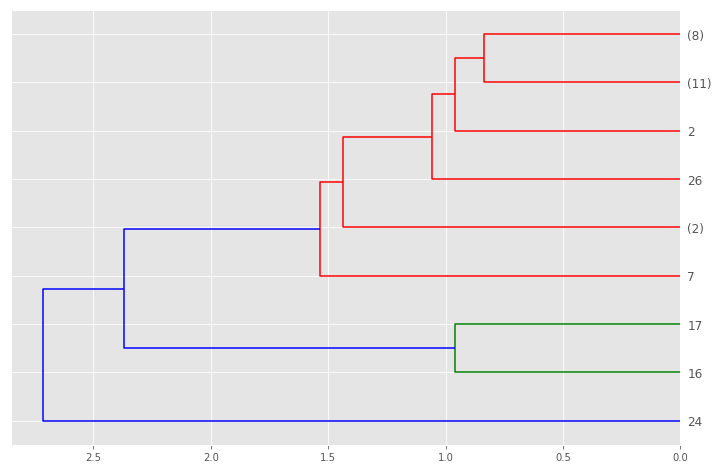

In [78]:
dendrogram(X_food_cl, truncate_mode='lastp', p=9, orientation='left')

## DBSCAN: Геоданные

In [3]:
# Опционально, установите matplotlib.basemap
# conda install -c conda-forge basemap-data-hires=1.0.8.dev0
import mpl_toolkits.basemap as bm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

Загрузите геоданные из `geo_data.txt` (lat, lon).

Будем пытаться кластеризовать данные с помощью DBSCAN и меры [haversine](https://en.wikipedia.org/wiki/Haversine_formula)

In [4]:
df_geo = pd.read_csv('data/geo_data.txt', sep='\t', header=None,
                     names=['lat', 'lon'])/10000

In [5]:
df_geo.head()

,lat,lon
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437


In [6]:
def plot_geo(lat, lon, labels=None):    
    try:
        lllat, lllon = lat.min()-1, lon.max()+1
        urlat, urlon = lat.max()+1, lon.min()-1

        plt.figure(figsize=(10, 10))

        m = bm.Basemap(
            llcrnrlon=lllon,
            llcrnrlat=lllat,
            urcrnrlon=urlon,
            urcrnrlat=urlat, 
            projection='merc',
            resolution='h'
        )

        m.drawcoastlines(linewidth=0.5)
        m.drawmapboundary(fill_color='#47A4C9', zorder=1)
        m.fillcontinents(color='#EBC4D8',lake_color='#47A4C9', zorder=2)

        parallels = np.linspace(lllat, urlat, 10)
        m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
        # draw meridians
        meridians = np.linspace(urlon, lllon, 10)
        m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

        m.scatter(lon, lat, latlon=True, cmap=plt.cm.jet,
              zorder=3, lw=0, c=labels)
    except:
        print('что-то пошло не так')
        plt.scatter(x=lon, y=lat, c=labels, cmap=plt.cm.jet)
        plt.axis('equal')

Для начала нарисуем все точки на карте

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


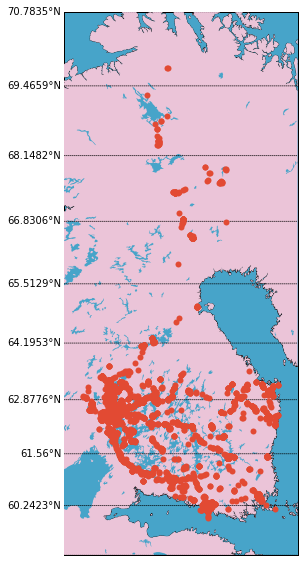

In [7]:
plot_geo(df_geo.loc[:, 'lat'].values, df_geo.loc[:, 'lon'].values)

Это данные с check-in людей в foursquare. В данных могут быть ошибки и просто непопулярные заведения.

Мы будем использовать расстояние haversine - на входе требуются координаты в **радианах**. Выход тоже будет в радианах. Чтобы перейти от градусов в радианты мы можем вспомнить тригонометрию, а можем воспользоваться функцией `np.radians`.

Для кого, чтобы не терять связь с реальностью, будем иметь ввиду, что расстояние в 1 радиан на земном шаре равно примерно 6371.0088 километрам.

Создайте матрицу X с координатами в радианах

In [8]:
km_in_radian = 6371.0088
X = np.radians(df_geo.values)
X[:10]

array([[1.09254644, 0.51912899],
       [1.09283093, 0.51913073],
       [1.09282744, 0.51915866],
       [1.09258309, 0.51905045],
       [1.09260753, 0.5191255 ],
       [1.09264243, 0.51926687],
       [1.09261451, 0.51913073],
       [1.09262324, 0.51918658],
       [1.09261276, 0.51913073],
       [1.09269828, 0.51920927]])

Как же определить, какие параметры для DBSCAN выставлять? Наибольшую проблемы представляет параметр eps.

Будем считать, что MinPts нам дан свыше  например для себя мы определили, что кластером будет считаться группа из **минимум** 20 точек - MinPts = 20). Воспользуемся следующим способом оценки:

* Расчитайте расстояние до k=MinPts ближайшего соседа каждой точки (класс `NearestNeighbors` и метод `kneighbors`)
* Отсортируйте полученный массив и выведите его на график
* По графику будет примерно понятно, сколько точек уйдет в шум, а сколько попадет в полноценный кластер при всевозможных `eps`
* Выберите eps, при котором график начинает "уходить вверх" (примерно 0.02-0.06, если все было сделано верно)

---------------------------------------------------------------------------------------------------------------
* eps - максимальное расстояние между двумя объектами одного класса

* min_samples - минимальное количество объектов в окрестности для точки, которая должна рассматриваться как точка ядра

* metric - метрика, используемая при расчете расстояния между объектами в массиве признаков

* metric_params - дополнительные аргументы для метрики

* algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'} - алгоритм для поиска ближайших соседей

* leaf_size- размер листа, который передается в BallTree или cKDTree

* p - мощность метрики Минковского

* n_jobs - количество параллельных потоков

In [11]:
MinPts = 20
nn = NearestNeighbors(n_neighbors=MinPts)
nn.fit(X)
rn=nn.kneighbors(X, n_neighbors=MinPts, return_distance=True)

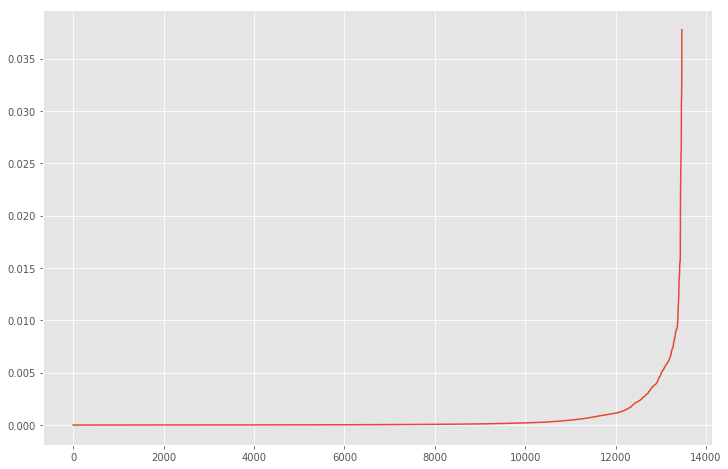

In [38]:
rns=np.sort(np.max(rn[0], axis=1))
plt.plot(rns)

Определим eps мы можем начать кластеризацию

* Создайте экземпляр класса DBSCAN, кластеризуйте данные
* Выведите полученные метки кластеров и их частоты
* Интерпретировать кластеры может оказаться затруднительно, но можно избавить от выборов и посмотреть на результат
    * Изобразите координаты точек, не попавших в кластер выбросов (метка -1) 

In [61]:
db = DBSCAN(eps=0.02, min_samples=MinPts).fit(X)
print(pd.Series(db.labels_).value_counts())

 0    13346
 1       66
-1       29
 2       26
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


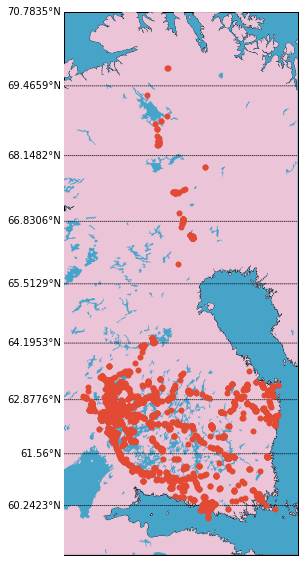

In [63]:
df_geo_w_clasters=df_geo.copy()
df_geo_w_clasters['group']=pd.Series(db.labels_)
df_geo_w_clasters.head()

plot_geo(df_geo_w_clasters[df_geo_w_clasters['group']!=-1].loc[:, 'lat'].values, df_geo_w_clasters[df_geo_w_clasters['group']!=-1].loc[:, 'lon'].values)

### Отток в игре: PCA + RFE

В этих данных предлагается построить модель оттока игрока из игрового проекта

Целевой мерой является `log_loss` - чем меньше значение, тем лучше. Для того, чтобы считать `log_loss`, например в `cross_val_score`, необходимо выставить `scoring=neg_log_loss`. Тогда на выходе вы получите **отрицательный** log_loss, который, соответственно, надо максимизировать

In [64]:
import seaborn as sns

In [65]:
df_X = pd.read_csv('data/x_train.csv', sep=';')
df_y = pd.read_csv('data/y_train.csv', names=['target'])

In [66]:
df = df_X.join(df_y)

In [67]:
df.head()

,maxPlayerLevel,numberOfAttemptedLevels,attemptsOnTheHighestLevel,totalNumOfAttempts,averageNumOfTurnsPerCompletedLevel,doReturnOnLowerLevels,numberOfBoostersUsed,fractionOfUsefullBoosters,totalScore,totalBonusScore,totalStarsCount,numberOfDaysActuallyPlayed,target
0,39,10,3,17,24.444444,1,5,0.400000,2650000,1375,21,2,0
1,21,22,19,55,17.045455,1,6,0.333333,5614000,3825,51,4,1
2,5,6,1,6,8.400000,0,1,1.000000,857000,1150,14,1,1
3,21,2,5,6,19.000000,0,1,0.000000,120000,0,1,1,1
4,4,5,1,5,9.600000,0,1,1.000000,857000,1075,12,1,0


Для начала визуализируйте графики со всеми парами исходных признаков с помощью `sns.pairplot` с раскраской по целевой переменной `target`.

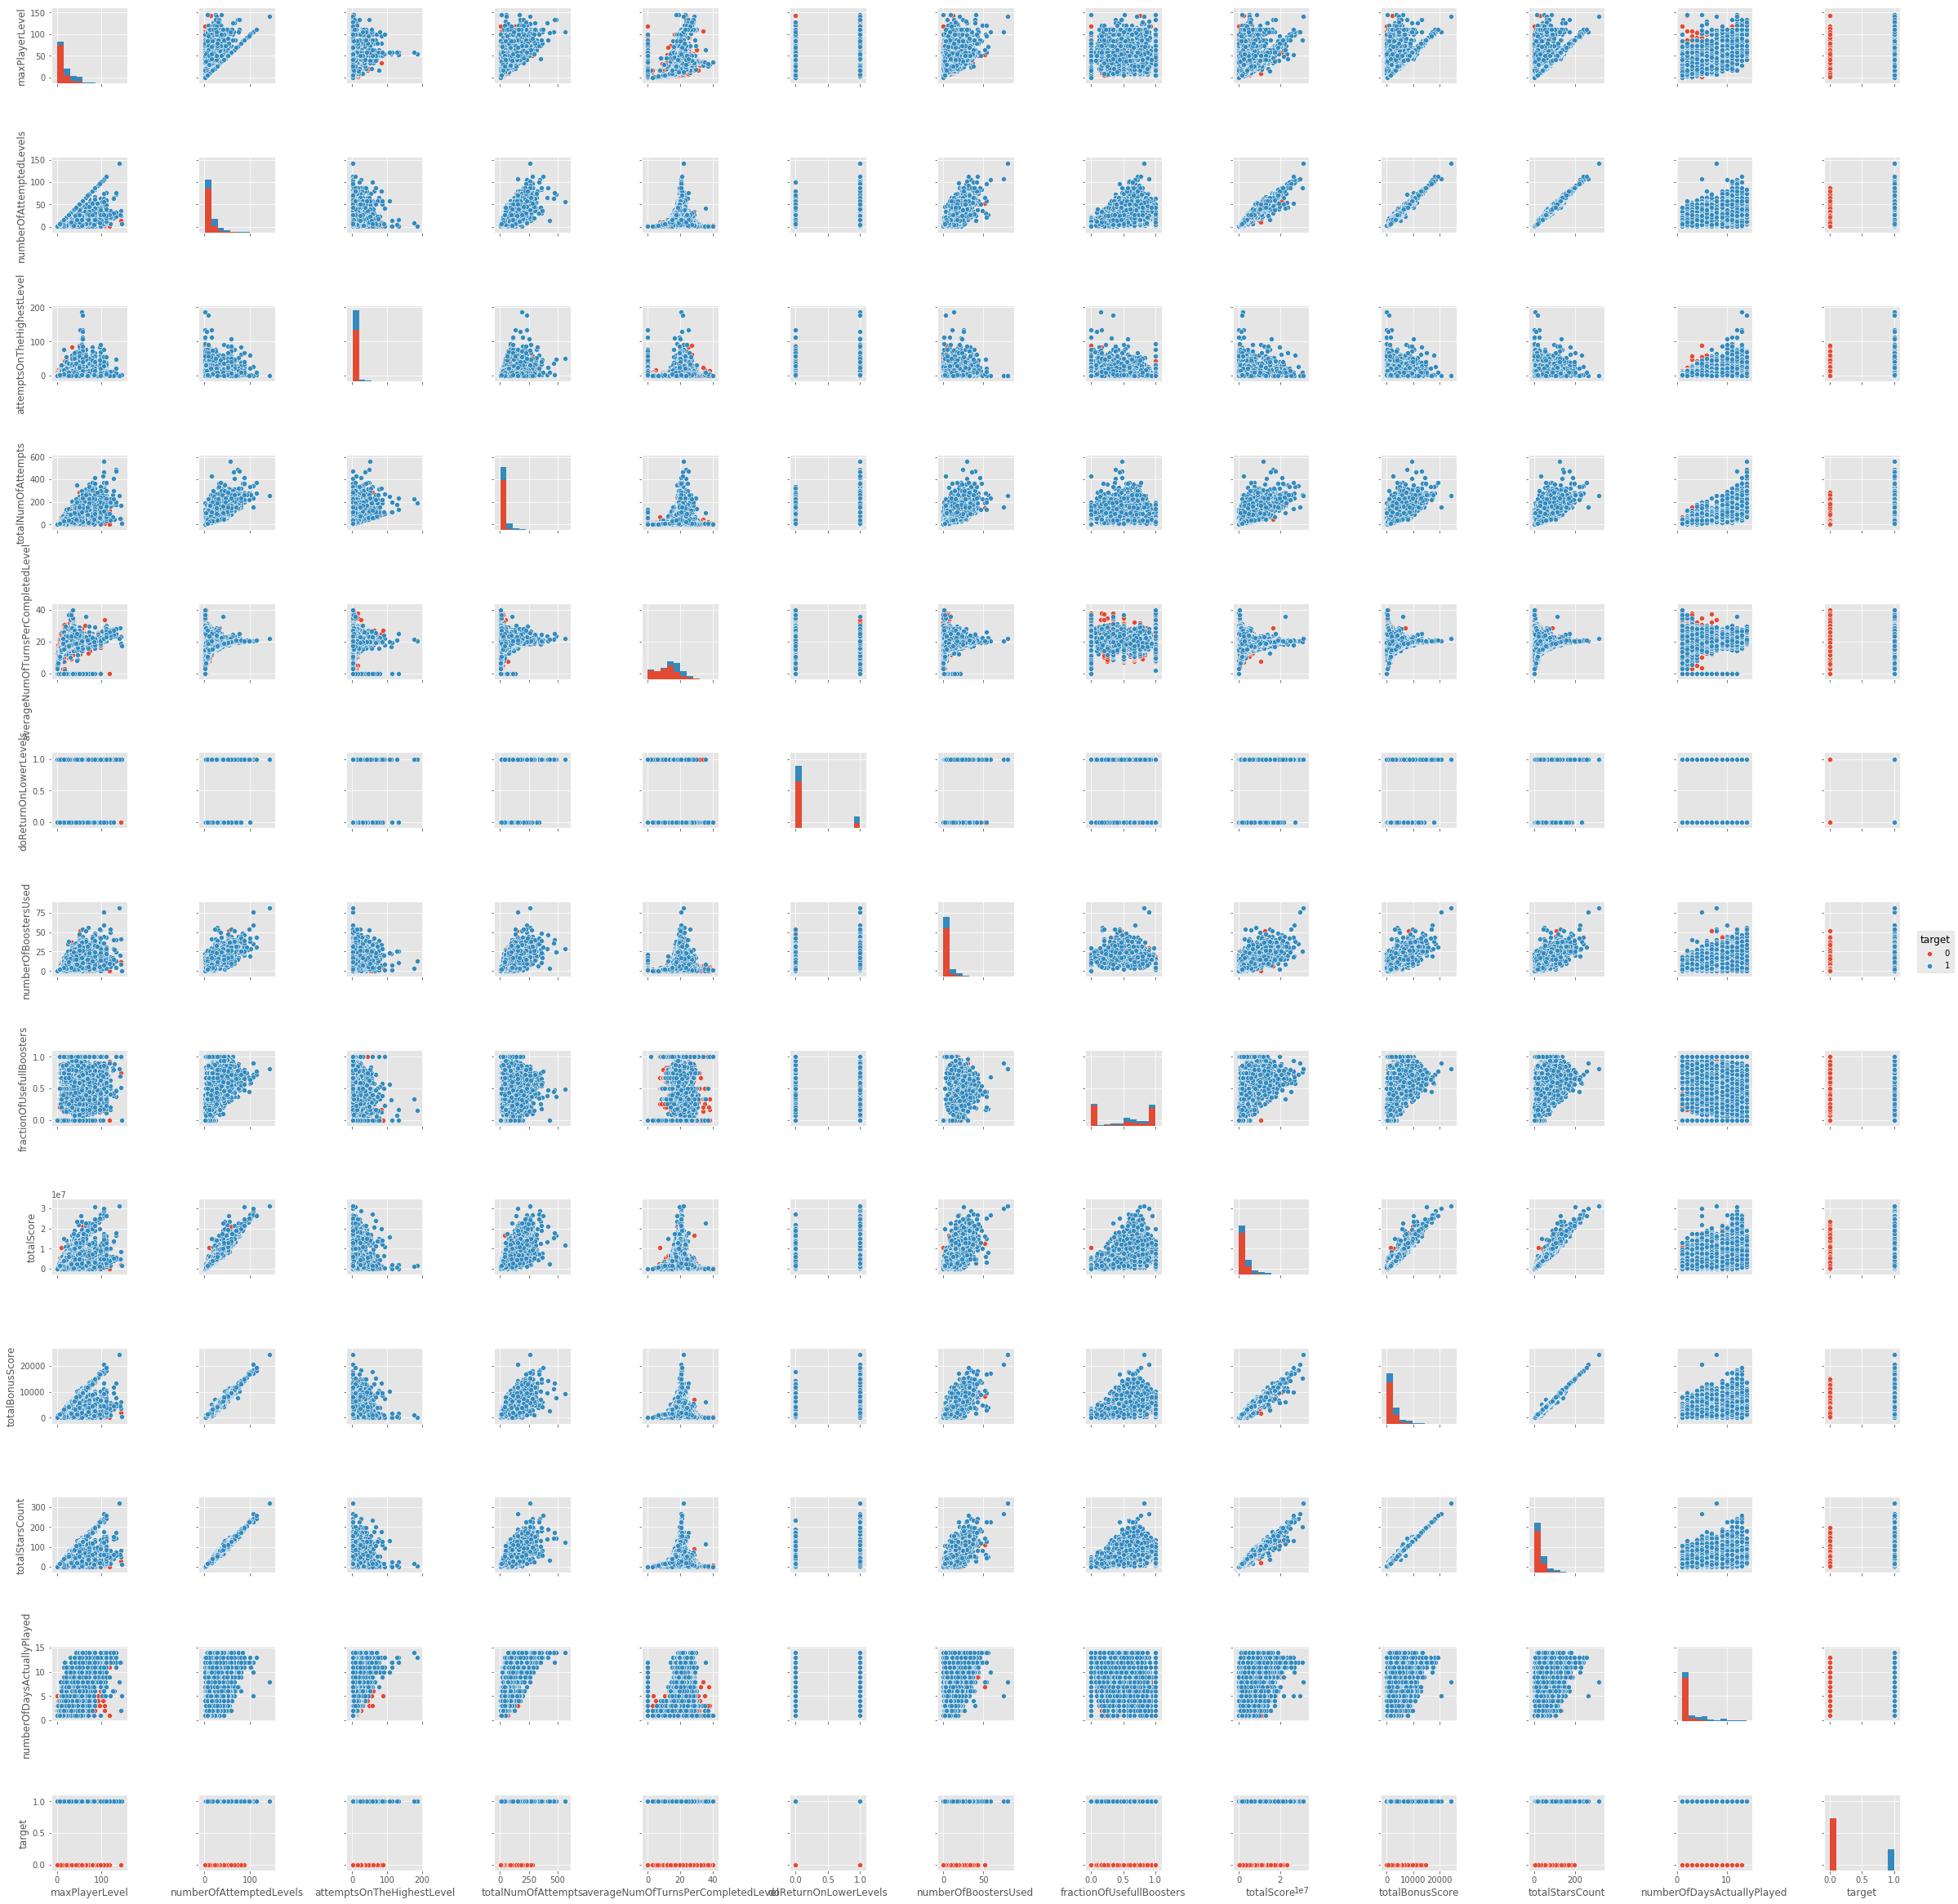

In [68]:
sns.pairplot(df, hue='target')

### Сжатие признаков для визуализации

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Составьте pipeline, в котором
* Признаки будут нормироваться
* Будет выполняться `PCA` преобразование на 3 компоненты

In [82]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('scaller', StandardScaler()),
    ('PCA', PCA(n_components=3))
])

Обучите pipeline на данных (без целевой переменной)

In [105]:
pipeline.fit(df.drop('target', axis=1))

Pipeline(memory=None,
     steps=[('scaller', StandardScaler(copy=True, with_mean=True, with_std=True)), ('PCA', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

Какую **суммарную долю** исходной дисперсии содержат в себе полученные компоненты?

In [106]:
pipeline.named_steps['PCA'].explained_variance_ratio_.sum()

0.8236223854718385

Изобразите сжатые данные в пространстве перых двух компонент. Раскрасте точки в цвет "класса".

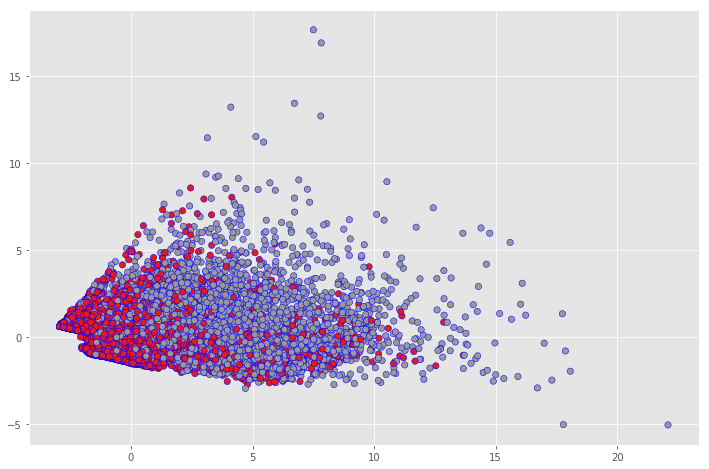

In [112]:
df_pca=pipeline.fit_transform(df.drop('target', axis=1))


fig, ax = plt.subplots()
ax.scatter(df_pca[:, 0], df_pca[:, 1], c=df['target'],
           cmap=plt.cm.Set1, edgecolor='b', s=40)
plt.show()

### RFE + Decision tree

In [113]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

Составьте модель, которая будет состоять из дерева решений, обернутое в RFECV
* Задайте схему кроссвалидации StratifiedKFold с 5 фолдами, перемешиванием и фиксированным random_state
* Для RFECV укажите scoring='neg_log_loss' и в параметр cv передайте схему из пункта выше

In [114]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

n_folds = 5
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=123)

* Обучите модель с разной максимальной глубиной дерева (от 3 до 7). 
* Для каждого значения глубины постройте график изменения качества модели в зависимости от количества признаков
* Для наилучшей настройки выведите название отобранных признаков

Лучшее количество признаков для макимальной глубины дерева = 3 : 12 

Перечень отобранных признаков для макимальной глубины дерева = 3 : ['maxPlayerLevel', 'numberOfAttemptedLevels', 'attemptsOnTheHighestLevel', 'totalNumOfAttempts', 'averageNumOfTurnsPerCompletedLevel', 'doReturnOnLowerLevels', 'numberOfBoostersUsed', 'fractionOfUsefullBoosters', 'totalScore', 'totalBonusScore', 'totalStarsCount', 'numberOfDaysActuallyPlayed']


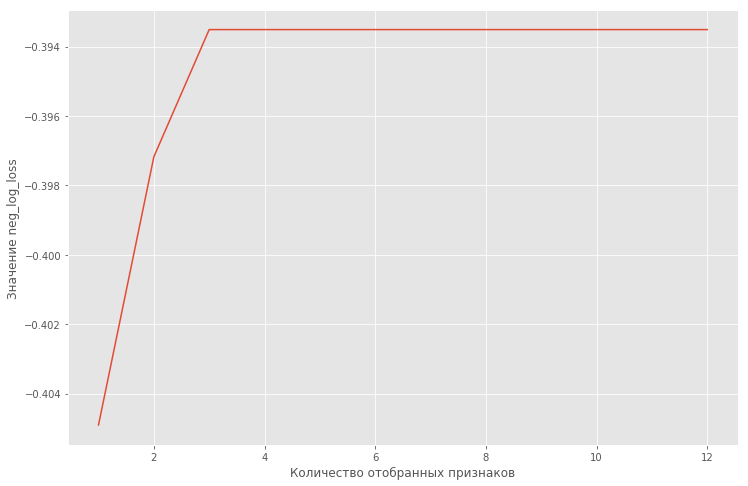

Лучшее количество признаков для макимальной глубины дерева = 4 : 3 

Перечень отобранных признаков для макимальной глубины дерева = 4 : ['maxPlayerLevel', 'totalNumOfAttempts', 'numberOfDaysActuallyPlayed']


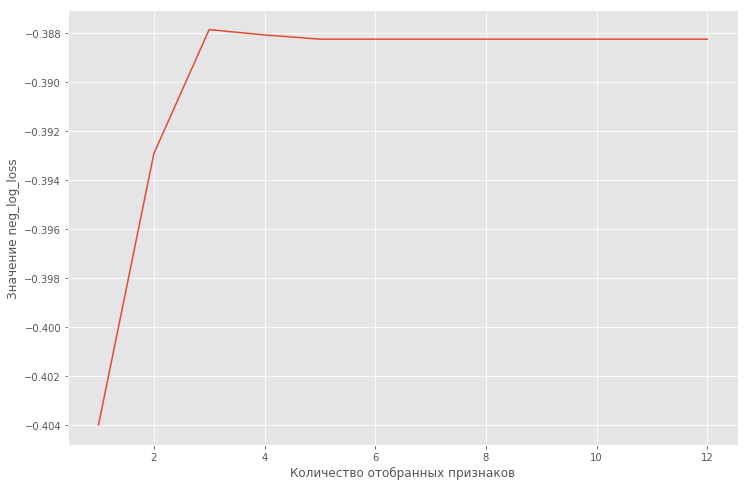

Лучшее количество признаков для макимальной глубины дерева = 5 : 5 

Перечень отобранных признаков для макимальной глубины дерева = 5 : ['maxPlayerLevel', 'totalNumOfAttempts', 'averageNumOfTurnsPerCompletedLevel', 'totalScore', 'numberOfDaysActuallyPlayed']


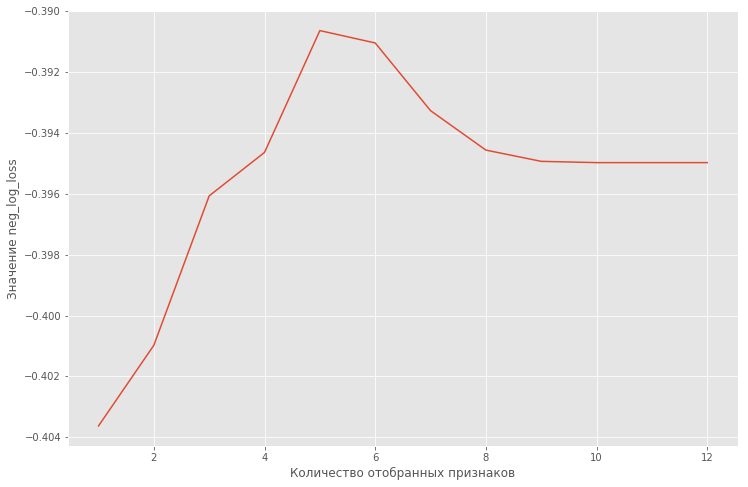

Лучшее количество признаков для макимальной глубины дерева = 6 : 1 

Перечень отобранных признаков для макимальной глубины дерева = 6 : ['numberOfDaysActuallyPlayed']


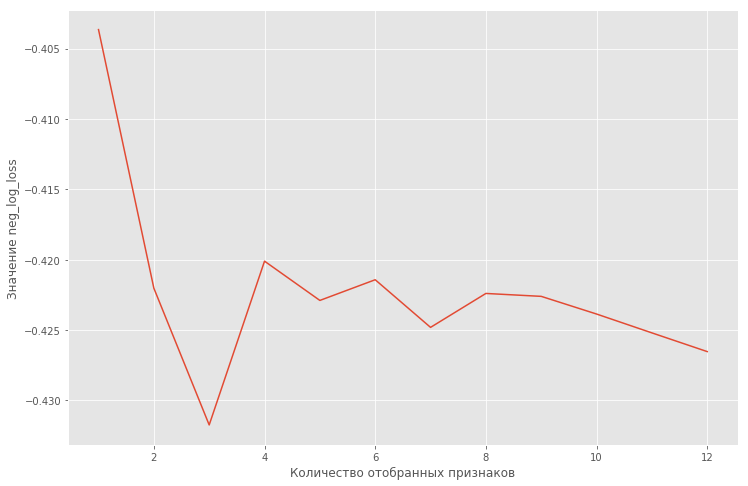

Лучшее количество признаков для макимальной глубины дерева = 7 : 1 

Перечень отобранных признаков для макимальной глубины дерева = 7 : ['numberOfDaysActuallyPlayed']


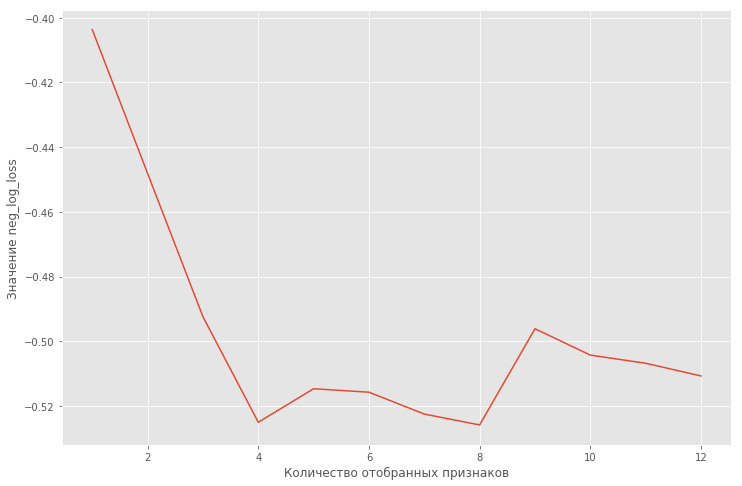

In [138]:
for i in range(3, 8):
    selector = RFECV(DecisionTreeClassifier(random_state=123, max_depth=i), cv=cv, scoring='neg_log_loss')
    selector = selector.fit(df.drop('target', axis=1), df['target'])
    idx = np.where(selector.ranking_ == 1)
    print('Лучшее количество признаков для макимальной глубины дерева =', i, ': %d' % selector.n_features_, '\n')
    print('Перечень отобранных признаков для макимальной глубины дерева =', i, ':', 
          list(df.drop('target', axis=1).columns[idx]))
    
    plt.figure()
    plt.xlabel('Количество отобранных признаков')
    plt.ylabel('Значение neg_log_loss')
    plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
    plt.show()

Лучшее количество признаков для макимальной глубины дерева = 4 : 3 

Перечень отобранных признаков для макимальной глубины дерева = 4 : ['maxPlayerLevel', 'totalNumOfAttempts', 'numberOfDaysActuallyPlayed']